In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv("gurgaon_properties_missing_value_imputation.csv")

In [4]:
df.head(5)

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7586.0,3.0,2,2,2.0,New Property,850.0,0,0,0,0,0,2,8
1,flat,smart world gems,sector 89,0.95,8597.0,2.0,2,2,4.0,New Property,1226.0,1,1,0,0,0,2,38
2,flat,breez global hill view,sohna road,0.32,5470.0,2.0,2,1,17.0,New Property,1000.0,0,0,0,0,0,2,49
3,flat,bestech park view sanskruti,sector 92,1.60,8020.0,3.0,4,3+,10.0,Relatively New,1615.0,0,1,0,0,1,0,174
4,flat,suncity avenue,sector 102,0.48,9023.0,2.0,2,1,5.0,Relatively New,582.0,0,0,1,0,0,2,159


##### GOAL : 
To predict the price based on given user input (#bedrooms, bathrooms, location, etc)

- Since we are predicting the price, the columns 'society' and 'price_per_sqft' are not relevant and would be removed.
- 'price_per_sqft' would directly give the price, given the area(sqft).
- 'society' can be used to directly look up the prices elsewhere. Also, would create too many categories to be useful.

In [5]:
train_df = df.drop(columns = ['society', 'price_per_sqft'])

In [6]:
train_df.sample(5)

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,sector 36,0.82,3.0,2,2,2.0,New Property,850.0,0,0,0,0,0,2,8
788,flat,sector 37d,1.78,4.0,3,3,10.0,Relatively New,1983.0,0,1,0,0,0,2,127
220,flat,sector 2,0.95,2.0,2,3,10.0,Old Property,1573.0,0,0,0,0,0,0,88
1809,flat,sector 48,6.25,3.0,5,3+,5.0,Moderately Old,3200.0,0,1,0,0,0,0,49
873,flat,sector 69,1.43,3.0,3,2,1.0,Relatively New,1305.0,0,0,0,1,0,2,86


- Now, the 'luxury_score' column would be converted to a categorical column, since it wouldnt make sense to ask the user to provice the model with a 'luxury_score'.
- The 'luxury_score' would be categorized as: Low (score < 50), Medium(score 50-149), High(score >= 150)

In [7]:
def convert_luxury_score(score):
    try:
        if score<50:
            return "Low"
        if score<150:
            return "Medium"
        return "High"
    except:
        return None

In [8]:
train_df['luxury_category'] = train_df['luxury_score'].apply(convert_luxury_score)

In [9]:
train_df.head(5)

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category
0,flat,sector 36,0.82,3.0,2,2,2.0,New Property,850.0,0,0,0,0,0,2,8,Low
1,flat,sector 89,0.95,2.0,2,2,4.0,New Property,1226.0,1,1,0,0,0,2,38,Low
2,flat,sohna road,0.32,2.0,2,1,17.0,New Property,1000.0,0,0,0,0,0,2,49,Low
3,flat,sector 92,1.60,3.0,4,3+,10.0,Relatively New,1615.0,0,1,0,0,1,0,174,High
4,flat,sector 102,0.48,2.0,2,1,5.0,Relatively New,582.0,0,0,1,0,0,2,159,High


Similar to above, we can also categorize Floor numbers based on "Low", "Mid" or "High" floors, as it is not practical to ask for exact floor numbers.

In [10]:
def categorize_floors(floorNum):
    try:
        if floorNum <= 2:
            return "Low Floor" 
        if floorNum <= 10:
            return "Mid Floor" 
        return "High Floor"
    except:
        return None

In [11]:
train_df['floor_category'] = train_df['floorNum'].apply(categorize_floors)

In [12]:
train_df.sample(5)

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category,floor_category
3262,flat,sector 70a,1.18,2.0,2,3,7.0,New Property,1400.0,0,0,0,1,0,2,140,Medium,Mid Floor
3041,flat,sector 25,3.40,4.0,4,3,1.0,Old Property,2744.0,0,1,0,0,0,2,26,Low,Low Floor
2986,flat,sector 67,1.00,3.0,3,3+,2.0,Moderately Old,1406.0,0,0,0,0,0,2,9,Low,Low Floor
2462,flat,sector 33,1.20,2.0,2,3+,3.0,Under Construction,1111.0,0,0,0,0,0,2,105,Medium,Mid Floor
2948,house,sector 7,2.25,5.0,3,0,2.0,Old Property,148.0,0,0,0,0,0,2,0,Low,Low Floor


In [13]:
train_df.drop(columns= ['floorNum', 'luxury_score'], inplace=True)

In [33]:
train_df['bedRoom'] = train_df['bedRoom'].astype(int)
train_df['built_up_area'] = train_df['built_up_area'].astype(int)

In [34]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,flat,sector 36,0.82,3,2,2,New Property,850,0,0,0,0,0,2,Low,Low Floor
1,flat,sector 89,0.95,2,2,2,New Property,1226,1,1,0,0,0,2,Low,Mid Floor
2,flat,sohna road,0.32,2,2,1,New Property,1000,0,0,0,0,0,2,Low,High Floor
3,flat,sector 92,1.60,3,4,3+,Relatively New,1615,0,1,0,0,1,0,High,Mid Floor
4,flat,sector 102,0.48,2,2,1,Relatively New,582,0,0,1,0,0,2,High,Mid Floor


## Feature Selection 

- Now, the feature selection algorithms would be used to identify the most useful features from the ones remaining, wrt the output column ie. price.
- The categorical columns would be converted to ordinal using the Ordinal Encoder from sklearn for above process

#### NOTE: 

- Although ordinal encoding will create issues with linear classifiers (due to higher values being ranked higher), since our goal is to get feature importances here, it wont impact as much.

In [35]:
from sklearn.preprocessing import OrdinalEncoder

In [36]:
train_df.dtypes

property_type       object
sector              object
price              float64
bedRoom              int64
bathroom             int64
balcony             object
agePossession       object
built_up_area        int64
study room           int64
servant room         int64
store room           int64
pooja room           int64
others               int64
furnishing_type      int64
luxury_category     object
floor_category      object
dtype: object

In [37]:

data_label_encoded = train_df.copy()

feats = ['property_type', 'sector', 'balcony', 'agePossession', 'luxury_category', 'floor_category']

for feature in feats:
    enc = OrdinalEncoder()
    data_label_encoded[feature] = enc.fit_transform(data_label_encoded[feature].to_numpy().reshape(-1, 1)).astype(int)
    print(enc.categories_)

X_label = data_label_encoded.drop(columns=['price'])
y_label = data_label_encoded['price']

[array(['flat', 'house'], dtype=object)]
[array(['dwarka expressway', 'gwal pahari', 'manesar', 'sector 1',
       'sector 102', 'sector 103', 'sector 104', 'sector 105',
       'sector 106', 'sector 107', 'sector 108', 'sector 109',
       'sector 10a', 'sector 11', 'sector 110', 'sector 111',
       'sector 112', 'sector 113', 'sector 12', 'sector 13', 'sector 14',
       'sector 15', 'sector 17', 'sector 17a', 'sector 17b', 'sector 2',
       'sector 21', 'sector 22', 'sector 23', 'sector 24', 'sector 25',
       'sector 26', 'sector 27', 'sector 28', 'sector 3',
       'sector 3 phase 2', 'sector 3 phase 3 extension', 'sector 30',
       'sector 31', 'sector 33', 'sector 36', 'sector 36a', 'sector 37',
       'sector 37c', 'sector 37d', 'sector 38', 'sector 39', 'sector 4',
       'sector 40', 'sector 41', 'sector 43', 'sector 45', 'sector 46',
       'sector 47', 'sector 48', 'sector 49', 'sector 5', 'sector 50',
       'sector 51', 'sector 52', 'sector 53', 'sector 54', 'sector 5

In [38]:
X_label.sample(5)

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
1798,0,63,1,1,1,2,672,0,0,0,0,0,0,2,2
2167,0,5,3,3,4,3,1670,0,0,0,0,0,2,1,2
526,0,111,2,2,2,3,1319,1,0,0,0,0,0,2,2
1058,0,95,3,3,3,3,1387,1,1,1,1,0,0,0,1
261,0,11,3,2,2,3,1701,0,0,0,0,0,2,0,2


### Feature selection 1 - Correlation with price

<Axes: >

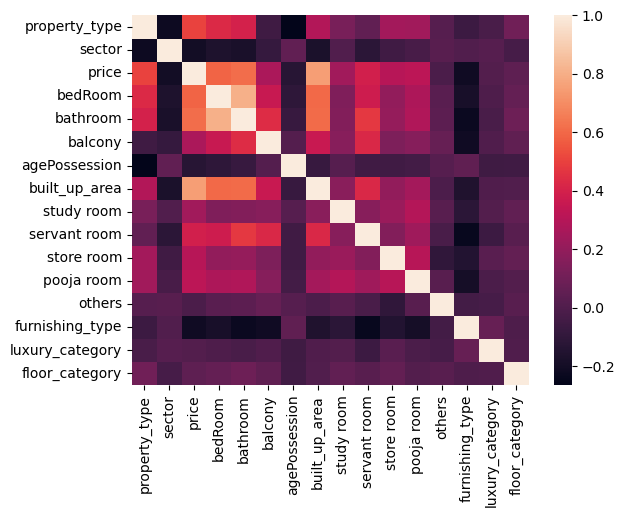

In [39]:
sns.heatmap(data_label_encoded.corr())

In [40]:
fi_1 = data_label_encoded.corr()
fi_1_df = pd.DataFrame(data={'features':fi_1.index.values,"correlation":fi_1['price'].iloc[:].values})

In [41]:
fi_1_df = fi_1_df[fi_1_df['features'] != 'price']

In [42]:
fi_1_df

,features,correlation
0,property_type,0.503728
1,sector,-0.201678
3,bedRoom,0.589557
4,bathroom,0.609777
5,balcony,0.269637
6,agePossession,-0.132989
7,built_up_area,0.748573
8,study room,0.242955
9,servant room,0.391930
10,store room,0.305677


In [87]:
fi_1_df

,features,correlation
0,property_type,0.503728
1,sector,-0.201678
3,bedRoom,0.591380
4,bathroom,0.609777
5,balcony,0.269637
6,agePossession,-0.132989
7,built_up_area,0.748574
8,study room,0.242955
9,servant room,0.391930
10,store room,0.305677


**Observation** : Price has decent correlation with builtup area, bedroom, bathroom. Hence they might be useful features in prediction.

### Feature selection 2 - Features from Random Forest

In [56]:
from sklearn.ensemble import RandomForestRegressor

rf_clf = RandomForestRegressor(n_estimators=100, random_state = 42)
rf_clf.fit(X_label, y_label)

RandomForestRegressor(random_state=42)

In [57]:
#rf_clf.feature_importances_
fi_2_df = pd.DataFrame(data={'features':X_label.columns.values, 'importances_rf':rf_clf.feature_importances_})

In [58]:
fi_2_df.sort_values('importances_rf')

,features,importances_rf
11,others,0.002869
10,pooja room,0.006201
14,floor_category,0.006394
12,furnishing_type,0.007292
13,luxury_category,0.008070
9,store room,0.008661
7,study room,0.008756
4,balcony,0.013185
5,agePossession,0.014307
8,servant room,0.019295


In [98]:
fi_2_df.sort_values('importances_rf')

,features,importances_rf
11,others,0.003270
10,pooja room,0.006097
14,floor_category,0.006292
12,furnishing_type,0.007398
13,luxury_category,0.007843
9,store room,0.008280
7,study room,0.008700
4,balcony,0.012644
5,agePossession,0.014529
8,servant room,0.019563


**Observation** : Again, built_up_area seems to be the most important feature wrt price. Some others like sector and property_type may also influence prices as per random forest model.

### Feature selection 3 - Gradient boosting model based feature importances

In [46]:
from sklearn.ensemble import GradientBoostingRegressor

gb_clf = GradientBoostingRegressor()
gb_clf.fit(X_label, y_label)

GradientBoostingRegressor()

In [47]:
fi_3_df = pd.DataFrame(data={'features':X_label.columns.values,'importances_gb':gb_clf.feature_importances_})
fi_3_df.sort_values('importances_gb')

,features,importances_gb
10,pooja room,0.000367
13,luxury_category,0.000381
11,others,0.000501
14,floor_category,0.000533
12,furnishing_type,0.001305
4,balcony,0.001678
5,agePossession,0.003725
7,study room,0.004138
9,store room,0.009537
8,servant room,0.021607


In [100]:
fi_3_df = pd.DataFrame(data={'features':X_label.columns.values,'importances_gb':gb_clf.feature_importances_})
fi_3_df.sort_values('importances_gb')

,features,importances_gb
10,pooja room,0.000450
13,luxury_category,0.000458
14,floor_category,0.000564
11,others,0.000631
12,furnishing_type,0.000922
4,balcony,0.001837
5,agePossession,0.003799
7,study room,0.004377
9,store room,0.009544
8,servant room,0.021556


### Feature selection 4 - Permutation Importance ie. Permute feature values and test fitted classifier to understand feature significance in classification/regression

In [54]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_label, y_label, train_size=0.8, random_state=42)

rf_clf = RandomForestRegressor(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

perm_imp = permutation_importance(rf_clf, X_test, y_test, n_repeats=30, random_state = 42)

In [55]:
fi_4_df = pd.DataFrame(data={'features':X_label.columns.values, 'importances_pi':perm_imp['importances_mean']})
fi_4_df.sort_values('importances_pi')

,features,importances_pi
7,study room,-0.015041
12,furnishing_type,-0.002523
14,floor_category,-0.000043
11,others,0.000367
9,store room,0.000532
10,pooja room,0.000564
4,balcony,0.001352
13,luxury_category,0.001511
5,agePossession,0.006566
3,bathroom,0.019904


In [103]:
fi_4_df = pd.DataFrame(data={'features':X_label.columns.values, 'importances_pi':perm_imp['importances_mean']})
fi_4_df.sort_values('importances_pi')

,features,importances_pi
7,study room,-0.013841
12,furnishing_type,-0.001506
14,floor_category,0.000431
11,others,0.000550
9,store room,0.001371
10,pooja room,0.001591
4,balcony,0.001885
13,luxury_category,0.003902
5,agePossession,0.006813
2,bedRoom,0.016871


### Feature selection 5 - Lasso based feature importances

**Note** : Since the encoding used are Ordinal, hence the linear models might not perform the best. 

In [50]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_scaled  = sc.fit_transform(X_label)

lasso_clf = Lasso(alpha = 0.01, random_state = 42)
lasso_clf.fit(X_scaled, y_label)


Lasso(alpha=0.01, random_state=42)

In [51]:
lasso_clf.coef_

array([ 0.71214961, -0.05285211,  0.03044462,  0.27120781, -0.04508981,
       -0.        ,  1.50921456,  0.17533957,  0.16694521,  0.19883652,
        0.07455511, -0.0144317 , -0.13862584,  0.05086015, -0.00162554])

In [52]:
fi_5_df = pd.DataFrame(data={'features':X_label.columns.values, 'importances_lasso':np.abs(lasso_clf.coef_)})
fi_5_df.sort_values('importances_lasso')

,features,importances_lasso
5,agePossession,0.000000
14,floor_category,0.001626
11,others,0.014432
2,bedRoom,0.030445
4,balcony,0.045090
13,luxury_category,0.050860
1,sector,0.052852
10,pooja room,0.074555
12,furnishing_type,0.138626
8,servant room,0.166945


In [109]:
fi_5_df = pd.DataFrame(data={'features':X_label.columns.values, 'importances_lasso':np.abs(lasso_clf.coef_)})
fi_5_df.sort_values('importances_lasso')

,features,importances_lasso
5,agePossession,0.000000
14,floor_category,0.001727
11,others,0.014450
2,bedRoom,0.017345
4,balcony,0.044796
13,luxury_category,0.050955
1,sector,0.052724
10,pooja room,0.074916
12,furnishing_type,0.138631
8,servant room,0.166623


### Feature selection 6 - Recursive feature elimination (RFE)

In [53]:
from sklearn.feature_selection import RFE

estimator = RandomForestRegressor()

feature_selector = RFE(estimator=estimator, n_features_to_select=X_label.shape[1], step=1)
feature_selector.fit(X_label, y_label)

RFE(estimator=RandomForestRegressor(), n_features_to_select=15)

In [59]:
#feature_selector.estimator_.feature_importances_
fi_6_df = pd.DataFrame(data={'features':X_label.columns.values, 'importances_rfe':feature_selector.estimator_.feature_importances_})
fi_6_df.sort_values('importances_rfe')

,features,importances_rfe
11,others,0.003275
10,pooja room,0.006172
14,floor_category,0.006351
13,luxury_category,0.006800
12,furnishing_type,0.006897
9,store room,0.009282
7,study room,0.010267
4,balcony,0.011712
5,agePossession,0.014796
8,servant room,0.018613


In [115]:
#feature_selector.estimator_.feature_importances_
fi_6_df = pd.DataFrame(data={'features':X_label.columns.values, 'importances_rfe':feature_selector.estimator_.feature_importances_})
fi_6_df.sort_values('importances_rfe')

,features,importances_rfe
11,others,0.003443
14,floor_category,0.006157
10,pooja room,0.006228
13,luxury_category,0.007471
9,store room,0.007547
12,furnishing_type,0.007659
7,study room,0.008840
4,balcony,0.012448
5,agePossession,0.013610
8,servant room,0.021080


### Feature selection 7 - Linear Regression coefficients

In [60]:
from sklearn.linear_model import LinearRegression

lin_reg_clf = LinearRegression()
lin_reg_clf.fit(X_scaled, y_label)

LinearRegression()

In [61]:
lin_reg_clf.coef_

array([ 7.12125432e-01, -6.17245566e-02,  3.33510138e-02,  2.77930165e-01,
       -6.80879394e-02,  1.49939060e-03,  1.51177923e+00,  1.83517524e-01,
        1.76277347e-01,  2.03132362e-01,  7.75165792e-02, -2.23569868e-02,
       -1.47875241e-01,  6.21598790e-02, -1.23002865e-02])

In [62]:
fi_7_df = pd.DataFrame(data = {'features':X_label.columns.values, 'importances_lr':np.abs(lin_reg_clf.coef_)})
fi_7_df.sort_values('importances_lr')

,features,importances_lr
5,agePossession,0.001499
14,floor_category,0.012300
11,others,0.022357
2,bedRoom,0.033351
1,sector,0.061725
13,luxury_category,0.062160
4,balcony,0.068088
10,pooja room,0.077517
12,furnishing_type,0.147875
8,servant room,0.176277


In [118]:
fi_7_df = pd.DataFrame(data = {'features':X_label.columns.values, 'importances_lr':np.abs(lin_reg_clf.coef_)})
fi_7_df.sort_values('importances_lr')

,features,importances_lr
5,agePossession,0.001376
14,floor_category,0.012409
2,bedRoom,0.020326
11,others,0.022372
1,sector,0.061598
13,luxury_category,0.062250
4,balcony,0.067800
10,pooja room,0.077877
12,furnishing_type,0.147879
8,servant room,0.175967


Merge the results from the 7 feature selection methods.

In [63]:
fi_merged_df = fi_1_df.merge(fi_2_df, on='features').merge(fi_3_df, on='features').merge(fi_4_df, on='features').merge(fi_5_df, on='features').merge(fi_6_df, on='features').merge(fi_7_df, on='features')

In [64]:
fi_merged_df

,features,correlation,importances_rf,importances_gb,importances_pi,importances_lasso,importances_rfe,importances_lr
0,property_type,0.503728,0.100076,0.096858,0.203449,0.712150,0.100803,0.712125
1,sector,-0.201678,0.103704,0.101417,0.182412,0.052852,0.101295,0.061725
2,bedRoom,0.589557,0.023774,0.038538,0.022184,0.030445,0.026431,0.033351
3,bathroom,0.609777,0.026884,0.035924,0.019904,0.271208,0.025939,0.277930
4,balcony,0.269637,0.013185,0.001678,0.001352,0.045090,0.011712,0.068088
5,agePossession,-0.132989,0.014307,0.003725,0.006566,0.000000,0.014796,0.001499
6,built_up_area,0.748573,0.650532,0.683491,0.740405,1.509215,0.651368,1.511779
7,study room,0.242955,0.008756,0.004138,-0.015041,0.175340,0.010267,0.183518
8,servant room,0.391930,0.019295,0.021607,0.023778,0.166945,0.018613,0.176277
9,store room,0.305677,0.008661,0.009537,0.000532,0.198837,0.009282,0.203132


In [65]:
#Since absolute values of correlation matter (not the sign)
fi_merged_df['correlation']=fi_merged_df['correlation'].apply(np.abs)
fi_merged_df

,features,correlation,importances_rf,importances_gb,importances_pi,importances_lasso,importances_rfe,importances_lr
0,property_type,0.503728,0.100076,0.096858,0.203449,0.712150,0.100803,0.712125
1,sector,0.201678,0.103704,0.101417,0.182412,0.052852,0.101295,0.061725
2,bedRoom,0.589557,0.023774,0.038538,0.022184,0.030445,0.026431,0.033351
3,bathroom,0.609777,0.026884,0.035924,0.019904,0.271208,0.025939,0.277930
4,balcony,0.269637,0.013185,0.001678,0.001352,0.045090,0.011712,0.068088
5,agePossession,0.132989,0.014307,0.003725,0.006566,0.000000,0.014796,0.001499
6,built_up_area,0.748573,0.650532,0.683491,0.740405,1.509215,0.651368,1.511779
7,study room,0.242955,0.008756,0.004138,-0.015041,0.175340,0.010267,0.183518
8,servant room,0.391930,0.019295,0.021607,0.023778,0.166945,0.018613,0.176277
9,store room,0.305677,0.008661,0.009537,0.000532,0.198837,0.009282,0.203132


In [66]:
fi_merged_df.index=fi_merged_df['features']
fi_merged_df = fi_merged_df.drop(columns=['features'])

In [67]:
fi_merged_df

,correlation,importances_rf,importances_gb,importances_pi,importances_lasso,importances_rfe,importances_lr
features,,,,,,,
property_type,0.503728,0.100076,0.096858,0.203449,0.712150,0.100803,0.712125
sector,0.201678,0.103704,0.101417,0.182412,0.052852,0.101295,0.061725
bedRoom,0.589557,0.023774,0.038538,0.022184,0.030445,0.026431,0.033351
bathroom,0.609777,0.026884,0.035924,0.019904,0.271208,0.025939,0.277930
balcony,0.269637,0.013185,0.001678,0.001352,0.045090,0.011712,0.068088
agePossession,0.132989,0.014307,0.003725,0.006566,0.000000,0.014796,0.001499
built_up_area,0.748573,0.650532,0.683491,0.740405,1.509215,0.651368,1.511779
study room,0.242955,0.008756,0.004138,-0.015041,0.175340,0.010267,0.183518
servant room,0.391930,0.019295,0.021607,0.023778,0.166945,0.018613,0.176277


Normalize the values of each row based on the sum of the column values

In [68]:
sum_column_values = fi_merged_df.sum(axis=0) #Sum of values in each column (new row with sum of all rows above)
fi_merged_norm = fi_merged_df.divide(sum_column_values, axis=1) #Normalize by the sum computed by adding all rows with the row values

In [ ]:
fi_min_max_scaled = fi_merged_df.copy()
for column in X_label.columns.values:
    fi_min_max_scaled[column] = ( fi_min_max_scaled[column] -  fi_min_max_scaled[column].min()) / ( fi_min_max_scaled[column].max() -  fi_min_max_scaled[column].min())

In [69]:
fi_merged_norm 

,correlation,importances_rf,importances_gb,importances_pi,importances_lasso,importances_rfe,importances_lr
features,,,,,,,
property_type,0.109602,0.100076,0.096858,0.171627,0.206889,0.100803,0.200506
sector,0.043882,0.103704,0.101417,0.153880,0.015354,0.101295,0.017379
bedRoom,0.128277,0.023774,0.038538,0.018714,0.008845,0.026431,0.009390
bathroom,0.132677,0.026884,0.035924,0.016790,0.078790,0.025939,0.078254
balcony,0.058668,0.013185,0.001678,0.001140,0.013099,0.011712,0.019171
agePossession,0.028936,0.014307,0.003725,0.005539,0.000000,0.014796,0.000422
built_up_area,0.162876,0.650532,0.683491,0.624595,0.438448,0.651368,0.425657
study room,0.052863,0.008756,0.004138,-0.012689,0.050939,0.010267,0.051671
servant room,0.085277,0.019295,0.021607,0.020059,0.048500,0.018613,0.049633


In [141]:
fi_merged_norm.mean(axis=1).sort_values(ascending=True)

features
others             0.003021
floor_category     0.003809
luxury_category    0.007643
agePossession      0.009564
balcony            0.017038
pooja room         0.018197
furnishing_type    0.020458
study room         0.023687
store room         0.029709
bedRoom            0.034574
servant room       0.037620
bathroom           0.056511
sector             0.077205
property_type      0.141918
built_up_area      0.519045
dtype: float64

**Observation**: 

- We can observe the feature importances as the mean of the 7 methods tried above
- Build_up_area, 'property_type' and 'sector' have consistently been observed to be important by all the methods above
- 'others' is a category which has been seen to be the least relevant
- The features with average score less than 0.03 would be tested using Random Forest Regressor to see if they affect the model performance (would be kept or removed accordingly)

In [143]:
from sklearn.model_selection import cross_val_score

rf_clf = RandomForestRegressor(n_estimators=150, random_state = 42)
scores = cross_val_score(rf_clf, X_label, y_label, cv=5 ,scoring='r2')


In [145]:
scores.mean()

0.8212331850010429

In [152]:
scores_2 = cross_val_score(rf_clf, X_label.drop(columns=['others', 'floor_category', 'luxury_category', 'agePossession', 'balcony', 'pooja room', 'furnishing_type', 'study room', 'store room']), y_label, cv=5 ,scoring='r2')
scores_2.mean()

0.8213811759475986

In [153]:
scores_3 = cross_val_score(rf_clf, X_label.drop(columns=['others', 'floor_category', 'luxury_category', 'agePossession', 'balcony', 'pooja room', 'furnishing_type', 'study room']), y_label, cv=5 ,scoring='r2')
scores_3.mean()

0.8218427082317324

In [154]:
scores_4 = cross_val_score(rf_clf, X_label.drop(columns=['others', 'floor_category', 'luxury_category', 'agePossession', 'balcony', 'pooja room', 'furnishing_type']), y_label, cv=5 ,scoring='r2')
scores_4.mean()

0.8257102302084107

In [155]:
scores_5 = cross_val_score(rf_clf, X_label.drop(columns=['others', 'floor_category', 'luxury_category', 'agePossession', 'balcony', 'pooja room']), y_label, cv=5 ,scoring='r2')
scores_5.mean()

0.8207822975111456

In [156]:
scores_6 = cross_val_score(rf_clf, X_label.drop(columns=['others', 'floor_category', 'luxury_category', 'agePossession', 'balcony']), y_label, cv=5 ,scoring='r2')
scores_6.mean()

0.8182609324083294

In [158]:
scores_7 = cross_val_score(rf_clf, X_label.drop(columns=['others', 'floor_category', 'luxury_category', 'agePossession']), y_label, cv=5 ,scoring='r2')
scores_7.mean()

0.82058038607203

In [159]:
scores_8 = cross_val_score(rf_clf, X_label.drop(columns=['others', 'floor_category', 'luxury_category']), y_label, cv=5 ,scoring='r2')
scores_8.mean()

0.8224690658696737

In [160]:
scores_9 = cross_val_score(rf_clf, X_label.drop(columns=['others', 'floor_category']), y_label, cv=5 ,scoring='r2')
scores_9.mean()

0.8217907750399043

In [161]:
scores_9 = cross_val_score(rf_clf, X_label.drop(columns=['others']), y_label, cv=5 ,scoring='r2')
scores_9.mean()

0.8191566450388471

**Observation** : 

- Removal of 'others', 'floor_category', 'luxury_category', 'agePossession', 'balcony', 'pooja room', 'furnishing_type' improved the cross validation accuracy significantly over the original cv score.
- Thus these features would be removed from the lower ranked features

In [171]:
X_label_final = X_label.drop(columns = ['others', 'floor_category', 'luxury_category'])

In [172]:
X_label_final['price'] = y_label

In [174]:
X_label_final 

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,furnishing_type,price
0,0.0,40.0,3.0,2,2.0,1.0,850.0,0,0,0,0,2,0.82
1,0.0,101.0,2.0,2,2.0,1.0,1226.0,1,1,0,0,2,0.95
2,0.0,111.0,2.0,2,1.0,1.0,1000.0,0,0,0,0,2,0.32
3,0.0,105.0,3.0,4,4.0,3.0,1615.0,0,1,0,0,0,1.60
4,0.0,4.0,2.0,2,1.0,3.0,582.0,0,0,1,0,2,0.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,0.0,96.0,2.0,2,1.0,3.0,532.0,0,0,0,0,2,0.37
3550,1.0,11.0,5.0,5,4.0,3.0,6228.0,1,1,1,1,2,6.00
3551,0.0,25.0,1.0,1,1.0,0.0,665.0,0,0,0,0,0,0.60
3552,1.0,50.0,5.0,6,3.0,0.0,5490.0,1,1,1,1,2,15.50


In [170]:
X_label_final.to_csv('gurgaon_properties_post_feature_selection.csv', index=False)